# Twitter Colombia Strike

# Data Processing

In [7]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", 140)

In [8]:
try:
    import nltk
    print("Libreria: 'nltk' esta instalada y se cargo correctamente")
except ModuleNotFoundError:
    print("Libreria: 'nltk' no esta instalada, se debe instalar")
    !pip install nltk
    import nltk


Libreria: 'nltk' esta instalada y se cargo correctamente


In [9]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download es_core_news_lg
!pip install contractions
!pip install emoji
!pip install emot
!pip install seaborn
!pip install DeepMoji
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     |████████████████████████████████| 1.6 MB 4.0 MB/s 
     |████████████████████████████████| 816 kB 51.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 5.8 MB 4.2 MB/s 
     |████████████████████████████████| 456 kB 63.2 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 10.1 MB 20.9 MB/s 
     |████████████████████████████████| 623 kB 74.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 568.4 MB 12 kB/s 
✔ Download and installation successful
You can

In [10]:
from nltk.text import Text
from nltk.tokenize import word_tokenize,sent_tokenize
import collections
import matplotlib.pyplot as plt
import seaborn as sbn
#import DeepMoji
import string
from wordcloud import WordCloud
nltk.download('stopwords')
import seaborn as sns 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing dataset

In [11]:
df1 = pd.read_csv('/content/drive/MyDrive/Data/Preprocessed Files/After Dropping Duplicates/Merger_twitter_spanish_topic modelling.csv')

df1.shape

(14078, 30)

In [12]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/Preprocessed Files/After Dropping Duplicates/Merged_twitter_english_topic_modelling.csv')
df2.shape

(4548, 30)

Cleaning tweets

In [ ]:
#df1.info()

In [21]:
def clean_tokenize (text):
    
    new_text = text.lower()  
    new_text = re.sub('http\S+', ' ', new_text)
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    new_text = re.sub(regex , ' ', new_text)
    new_text = re.sub("\d+", ' ', new_text)
    new_text = re.sub("\\s+", ' ', new_text)
    new_text = new_text.split(sep = ' ')
    new_text = [token for token in new_text if len(token) > 1]
    return(new_text)

In [22]:
df1['tweets_clean'] = df1['preprocessed_data'].apply(lambda x: clean_tokenize(x))
df1[['preprocessed_data', 'tweets_clean']].head()

,preprocessed_data,tweets_clean
0,"['hacer', 'mayo', 'cazar', 'fantasma', 'mayo']","[hacer, mayo, cazar, fantasma, mayo]"
1,"['despues', 'esperar', 'ancia', 'ahora', 'esperar', 'mayo', 'despue', 'ser', 'septiembre', 'inmagino', 'celebracion', 'ano', 'independen...","[despues, esperar, ancia, ahora, esperar, mayo, despue, ser, septiembre, inmagino, celebracion, ano, independencia, patria, ahora, si, j..."
2,"['esperar', 'llegar', 'oido', 'nuevo', 'iniciar', 'laboral', 'partir', 'proximo', 'mayo', 'dinero', 'invertia', 'privilegio', 'tiempo', ...","[esperar, llegar, oido, nuevo, iniciar, laboral, partir, proximo, mayo, dinero, invertia, privilegio, tiempo, atra, invertir, programa, ..."
3,"['menos', 'mes', 'mayo', 'urkullu', 'temer', 'perder', 'control', 'dar', 'paso', 'atro', 'urkullu', 'decir', 'ahora', 'si', 'cumplir', '...","[menos, mes, mayo, urkullu, temer, perder, control, dar, paso, atro, urkullu, decir, ahora, si, cumplir, todo, medida, impuesto, superar..."
4,"['edicion', 'festival', 'internacional', 'puente', 'hacia', 'lahabana', 'celebrar', 'abril', 'mayo', 'proximo', 'manera', 'online', 'baj...","[edicion, festival, internacional, puente, hacia, lahabana, celebrar, abril, mayo, proximo, manera, online, bajo, slogan, mihabanaesmusi..."


In [23]:
#Unnest preprocessed data
# ==============================================================================
tweets_tidy = df1.explode(column='tweets_clean')
#tweets_tidy = tweets_tidy.drop(columns='texto')
tweets_tidy = tweets_tidy.rename(columns={'tweets_clean':'token'})
#tweets_tidy.head(3)

In [ ]:
#tweets_tidy.token

In [16]:
type(tweets_tidy.token)

pandas.core.series.Series

In [24]:
data = pd.DataFrame(tweets_tidy['token'])

In [25]:
all_words = tweets_tidy['token']
w = collections.Counter(all_words)
new_df = pd.DataFrame.from_dict(w, orient= 'index').reset_index()
new_df.columns = ['Words', 'counts']
new_df = new_df.sort_values('counts', ascending = False)

In [19]:
plt.rcParams["figure.figsize"] = (20,6)

## Spanish Tweets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Spanish tweets')

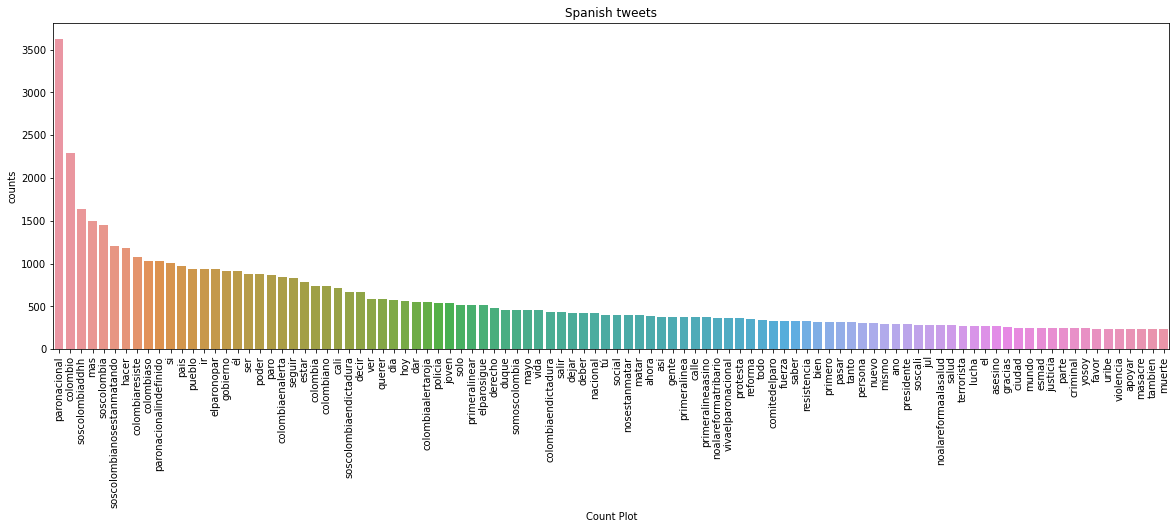

In [26]:
ax = sns.barplot(new_df.Words[:100], new_df.counts[:100])
plt.xticks(rotation = 90)
ax.set_xlabel("Count Plot")
ax.set_title('Spanish tweets')

In [27]:
spanish_stops = set( nltk.corpus.stopwords.words('spanish'))
spanish_stops.update(['token', 'dtype', 'Name', 'object', 'Length'])

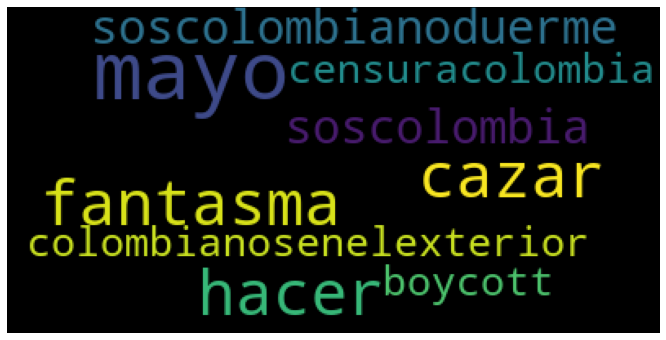

In [28]:
s = str(all_words)
wordcloud = WordCloud(max_font_size=50, stopwords = spanish_stops).generate(s)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
df2['tweets_clean'] = df2['preprocessed_data'].apply(lambda x: clean_tokenize(x))
#df2[['preprocessed_data', 'tweets_clean']].head()

In [35]:
# Unnest column with preprocessed data
# ==============================================================================
tweets_tidy2 = df2.explode(column='tweets_clean')
#tweets_tidy = tweets_tidy.drop(columns='texto')
tweets_tidy2 = tweets_tidy2.rename(columns={'tweets_clean':'token'})
#tweets_tidy.head(3)

In [36]:
data2 = pd.DataFrame(tweets_tidy2['token'])
#data2

In [37]:
all_words2 = tweets_tidy2['token']
w2 = collections.Counter(all_words2)
new_df2 = pd.DataFrame.from_dict(w2, orient= 'index').reset_index()
new_df2.columns = ['Words', 'counts']
new_df2 = new_df2.sort_values('counts', ascending = False)

## English Tweets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'English tweets')

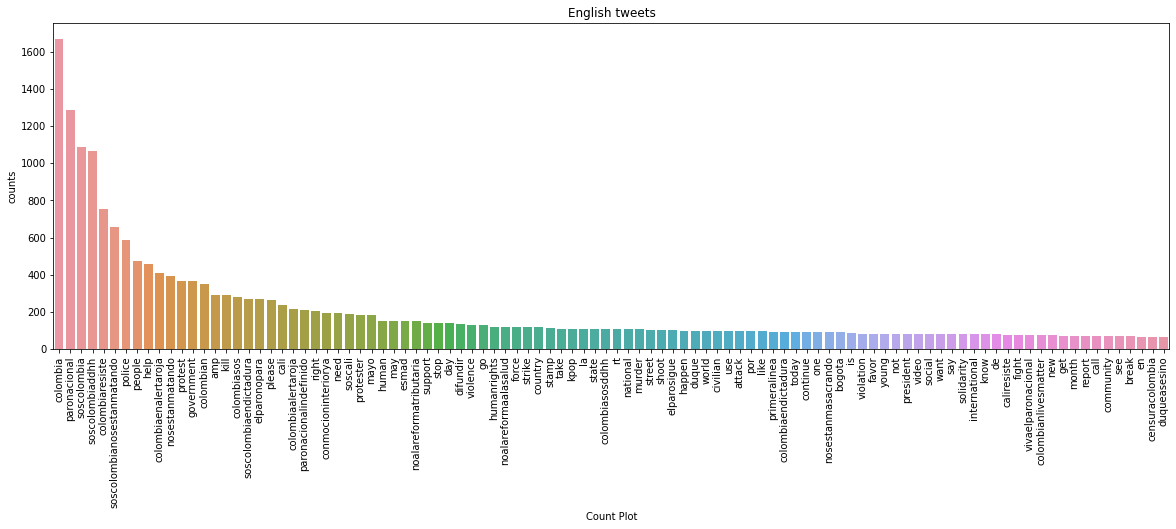

In [38]:
ax = sns.barplot(new_df2.Words[:100], new_df2.counts[:100])
plt.xticks(rotation = 90)
ax.set_xlabel("Count Plot")
ax.set_title('English tweets')

In [39]:
english_stops = set( nltk.corpus.stopwords.words('english'))
english_stops.update(['token', 'dtype', 'Name', 'object', 'Length'])

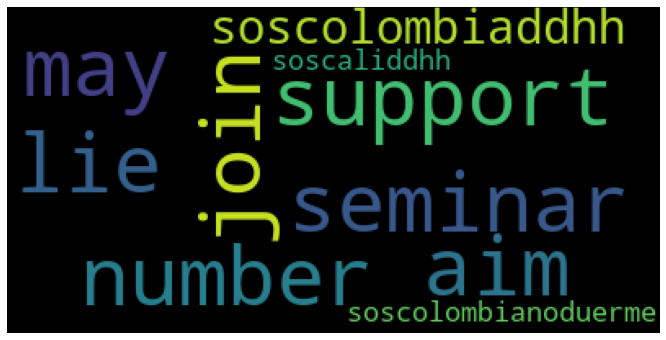

In [40]:
s2 = str(all_words2)
wordcloud = WordCloud(max_font_size=50, stopwords = english_stops).generate(s2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()